in case you want this: 

Stakeholders:
a) C-suite employees (e.g., CEO, CFO, etc.) who will want to ensure profitability and lack of drain on the companies overall resources.

b) Potential new employees, especially those who will run this new division. Because it takes exceptional organizational skills and industry knowledge to run a movie studio, Microsoft will need to vie for that talent. Showing that they have researched the business problem and received valuable insights, will help lure in those most qualified to launch this new studio. Demonstrating that the company has taken the effort to attain these insights also shows qualified candidates that they can rely upon C-suite employees to provide necessary resources (e.g., money, physical resources, physical space and further talent.) In other words C-suite will be demonstrating their willingness to support this new division by taking the initiative to gather preliminary insights.

c) Potential writers, directors, cinematographers, etc. who will want to know that they if they sign on for individual or prolonged contracts, that theit work, talent and time won't be wasted by a studio that is ill-equipped to produce what they are working on.

In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [2]:
!ls ../zippedData/

bom.movie_gross.csv.gz       imdb.title.ratings.csv.gz
imdb.name.basics.csv.gz      rt.movie_info.tsv.gz
imdb.title.akas.csv.gz       rt.reviews.tsv.gz
imdb.title.basics.csv.gz     tmdb.movies.csv.gz
imdb.title.crew.csv.gz       tn.movie_budgets.csv.gz
imdb.title.principals.csv.gz


In [3]:
df_imdb_combined_prof = pd.read_csv('../imdb_combined_prof.csv')
#Reading in file cleaned by other group member.

In [4]:
df_imdb_combined_prof.head() #Data exploration

,Unnamed: 0,Unnamed: 0_x,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,...,worldwide_gross,ROI %,ROI $,year,month,inflation,worldwide_gross_inf,domestic_gross_inf,production_budget_inf,ROI $ Inf
0,0,20,tt0249516,Foodfight!,Foodfight!,2012,91.0,"['Action', 'Animation', 'Comedy']",1.9,8248.0,...,73706,-0.998362,-44926294,2012,December,1.19,8.771014e+04,0.000000e+00,53550000.0,-5.346229e+07
1,1,54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"['Adventure', 'Comedy', 'Drama']",7.3,275300.0,...,187861183,1.064409,96861183,2013,December,1.17,2.197976e+08,6.813710e+07,106470000.0,1.133276e+08
2,2,58,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"['Action', 'Crime', 'Drama']",6.5,105116.0,...,62108587,1.218164,34108587,2014,September,1.15,7.142488e+07,2.992034e+07,32200000.0,3.922488e+07
3,3,60,tt0369610,Jurassic World,Jurassic World,2015,124.0,"['Action', 'Adventure', 'Sci-Fi']",7.0,539338.0,...,1648854864,6.669092,1433854864,2015,June,1.15,1.896183e+09,7.501112e+08,247250000.0,1.648933e+09
4,4,62,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"['Comedy', 'Drama']",6.2,94787.0,...,21544732,-0.521228,-23455268,2011,October,1.21,2.606913e+07,1.586288e+07,54450000.0,-2.838087e+07


In [5]:
df_imdb_combined_prof.columns #Data exploration

Index(['Unnamed: 0', 'Unnamed: 0_x', 'tconst', 'primary_title',
       'original_title', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes', 'directors', 'writers', 'actor', 'actress',
       'archive_footage', 'archive_sound', 'cinematographer', 'composer',
       'director_pr', 'editor', 'producer', 'production_designer', 'self',
       'writer_pr', 'concat', 'Unnamed: 0_y', 'id', 'release_date', 'movie',
       'production_budget', 'domestic_gross', 'worldwide_gross', 'ROI %',
       'ROI $', 'year', 'month', 'inflation', 'worldwide_gross_inf',
       'domestic_gross_inf', 'production_budget_inf', 'ROI $ Inf'],
      dtype='object')

In [6]:
#Data exploration: finding null values within the feature I will explore.
df_imdb_combined_prof['genres'].isna().sum() 

4

In [7]:
#Data cleaning: dropping null values within the feature I will explore.
df_imdb_combined_prof.dropna(subset= ['genres'], inplace = True)

In [8]:
#convert to list type
df_imdb_combined_prof['genres'] = df_imdb_combined_prof['genres'].apply(literal_eval)
#using .
df_imdb_combined_prof_exploded = df_imdb_combined_prof.explode('genres')

In [9]:
df_imdb_combined_prof_exploded.head()

,Unnamed: 0,Unnamed: 0_x,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,...,worldwide_gross,ROI %,ROI $,year,month,inflation,worldwide_gross_inf,domestic_gross_inf,production_budget_inf,ROI $ Inf
0,0,20,tt0249516,Foodfight!,Foodfight!,2012,91.0,Action,1.9,8248.0,...,73706,-0.998362,-44926294,2012,December,1.19,8.771014e+04,0.00,53550000.0,-5.346229e+07
0,0,20,tt0249516,Foodfight!,Foodfight!,2012,91.0,Animation,1.9,8248.0,...,73706,-0.998362,-44926294,2012,December,1.19,8.771014e+04,0.00,53550000.0,-5.346229e+07
0,0,20,tt0249516,Foodfight!,Foodfight!,2012,91.0,Comedy,1.9,8248.0,...,73706,-0.998362,-44926294,2012,December,1.19,8.771014e+04,0.00,53550000.0,-5.346229e+07
1,1,54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,Adventure,7.3,275300.0,...,187861183,1.064409,96861183,2013,December,1.17,2.197976e+08,68137100.46,106470000.0,1.133276e+08
1,1,54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,Comedy,7.3,275300.0,...,187861183,1.064409,96861183,2013,December,1.17,2.197976e+08,68137100.46,106470000.0,1.133276e+08


In [10]:
df_imdb_combined_prof_exploded['ROI_percent'] = df_imdb_combined_prof_exploded['ROI %']*100

In [11]:
df_imdb_combined_prof_exploded.describe()

,Unnamed: 0,Unnamed: 0_x,start_year,runtime_minutes,averagerating,numvotes,Unnamed: 0_y,id,production_budget,domestic_gross,worldwide_gross,ROI %,ROI $,year,inflation,worldwide_gross_inf,domestic_gross_inf,production_budget_inf,ROI $ Inf,ROI_percent
count,3628.000000,3628.000000,3628.000000,3613.000000,3587.000000,3.587000e+03,3628.000000,3628.000000,3.628000e+03,3.628000e+03,3.628000e+03,3628.000000,3.628000e+03,3628.000000,3628.000000,3.628000e+03,3.628000e+03,3.628000e+03,3.628000e+03,3628.000000
mean,704.062569,32624.940187,2013.929713,109.002491,6.397547,1.303794e+05,2202.659316,50.902977,5.163254e+07,6.469450e+07,1.647183e+08,2.958087,1.130858e+08,2013.929713,1.163343,1.906044e+08,7.493846e+07,5.991028e+07,1.306941e+08,295.808748
std,412.352357,31910.033824,2.616730,18.122224,0.966263,1.710300e+05,1603.733695,28.684703,5.909275e+07,9.029012e+07,2.507462e+08,12.954086,2.082313e+08,2.616730,0.047510,2.881977e+08,1.037799e+08,6.838121e+07,2.389361e+08,1295.408619
min,0.000000,20.000000,2010.000000,4.000000,1.600000,5.000000e+00,1.000000,1.000000,2.500000e+04,0.000000e+00,2.600000e+01,-0.999974,-2.002376e+08,2010.000000,1.070000,2.990000e+01,0.000000e+00,2.875000e+04,-2.142543e+08,-99.997400
25%,346.000000,7176.750000,2012.000000,96.000000,5.800000,2.507200e+04,752.000000,26.000000,1.100000e+07,8.008161e+06,1.699009e+07,0.027251,3.622980e+05,2012.000000,1.140000,2.004793e+07,9.206877e+06,1.265000e+07,3.876589e+05,2.725130
50%,703.500000,20630.000000,2014.000000,106.000000,6.500000,7.255100e+04,1959.000000,51.000000,3.000000e+07,3.506785e+07,6.745174e+07,1.321356,3.373596e+07,2014.000000,1.150000,7.910541e+07,4.012241e+07,3.330000e+07,3.922283e+07,132.135567
75%,1061.000000,51625.000000,2016.000000,119.000000,7.100000,1.648290e+05,3482.000000,76.000000,6.800000e+07,8.001484e+07,1.971157e+08,3.202364,1.262559e+08,2016.000000,1.190000,2.235658e+08,9.273739e+07,7.980000e+07,1.473772e+08,320.236405
max,1421.000000,145937.000000,2019.000000,180.000000,8.800000,1.841066e+06,5748.000000,100.000000,4.106000e+08,7.000596e+08,2.048134e+09,415.564740,1.748134e+09,2019.000000,1.250000,2.232466e+09,7.630649e+08,4.968260e+08,1.905466e+09,41556.474000


In [12]:
avg_ROI_top3 = (933+936+582)/3
avg_ROI_all = 296
perc_diff = ((avg_ROI_top3-avg_ROI_all)/avg_ROI_all)*100
perc_diff

176.01351351351352

In [13]:
genre_ROI = df_imdb_combined_prof_exploded.groupby('genres').ROI_percent
genre_ROI.describe()

,count,mean,std,min,25%,50%,75%,max
genres,,,,,,,,
Action,422.0,176.022480,266.514229,-99.997400,10.454739,121.973286,265.747196,3001.627558
Adventure,343.0,214.725842,240.081434,-99.940000,58.551265,166.547080,306.361513,1468.021855
Animation,98.0,278.690125,283.655108,-99.836209,88.758585,199.854564,344.781974,1468.021855
Biography,132.0,245.847575,444.809535,-99.635600,-26.556187,91.735751,310.037452,3001.627558
Comedy,489.0,231.983947,337.956001,-99.997400,28.196287,147.605545,320.288082,2617.924114
Crime,222.0,126.617238,222.168965,-99.976860,-25.251400,70.599137,204.299098,1543.458800
Documentary,48.0,209.979082,498.276837,-99.980723,-80.771000,71.934356,209.419928,2876.130200
Drama,687.0,237.472679,470.076602,-99.997400,-24.778306,94.570367,306.392434,4249.700800
Family,88.0,169.048638,256.912131,-99.940000,26.489052,107.618868,229.642191,1423.023560


In [14]:
ROI_by_genre = df_imdb_combined_prof_exploded.groupby('genres').ROI_percent.agg('mean')
ROI_by_genre = ROI_by_genre.sort_values(ascending = False)
ROI_by_genre

genres
Mystery        935.682455
Horror         933.490018
Thriller       582.058457
Sci-Fi         280.732439
Animation      278.690125
Romance        277.614448
Music          254.681873
Biography      245.847575
Drama          237.472679
Comedy         231.983947
Musical        229.236081
Fantasy        227.497703
Adventure      214.725842
Documentary    209.979082
Action         176.022480
Family         169.048638
History        154.924390
Crime          126.617238
Sport          116.350760
Western         87.547842
War             41.110865
Name: ROI_percent, dtype: float64

In [15]:
df_Mystery = df_imdb_combined_prof_exploded[df_imdb_combined_prof_exploded['genres']=='Mystery']
df_Mystery = df_Mystery.sort_values('ROI_percent', ascending = False)
df_Mystery = df_Mystery[['original_title', 'ROI_percent', 'start_year']]
#df_Mystery = df_Mystery.groupby(['original_title', 'start_year']).ROI_percent.agg('mean')
df_Mystery_sorted = df_Mystery.sort_values(by = 'ROI_percent', ascending = False)
print(df_Mystery_sorted['ROI_percent'].describe())
df_Mystery_sorted[:50].reset_index()
#df_Mystery_sorted.loc[:]

count      118.000000
mean       935.682455
std       3890.431928
min        -99.616941
25%         24.655190
50%        257.317468
75%        628.086661
max      41556.474000
Name: ROI_percent, dtype: float64


,index,original_title,ROI_percent,start_year
0,910,The Gallows,41556.474000,2015
1,1318,Get Out,5007.359020,2017
2,781,Chernobyl Diaries,4141.172100,2012
3,669,Paranormal Activity 3,4040.796880,2011
4,1115,Annabelle,3851.737231,2014
5,1299,Lights Out,2876.130200,2016
6,747,Sinister,2824.260233,2012
7,824,Paranormal Activity 4,2756.359840,2012
8,1331,Happy Death Day,2400.205200,2017
9,192,10 Cloverfield Lane,2065.728440,2016


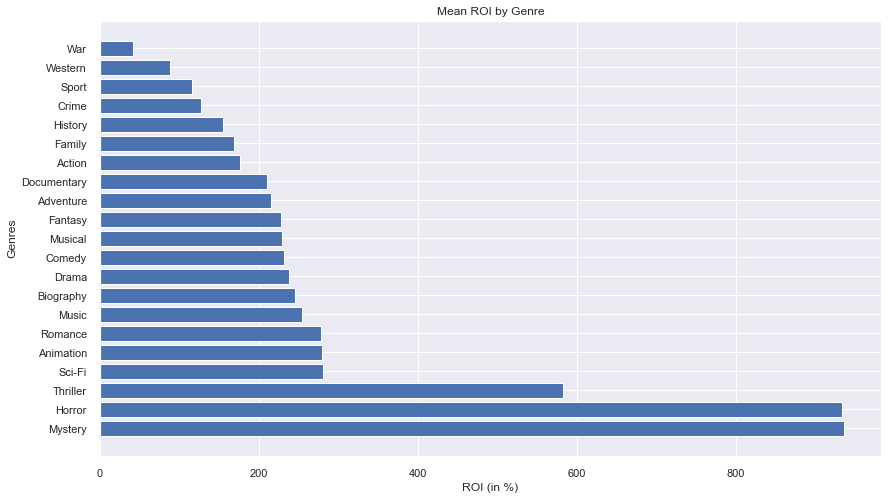

In [38]:
fig, ax = plt.subplots(figsize = (14,8))

y = ROI_by_genre.index
x = ROI_by_genre.values
ax = plt.barh(y = y, width = x)

plt.title('Mean ROI by Genre')
plt.xlabel('ROI (in %)')
plt.ylabel('Genres')

sns.set(font_scale = 1)


In [17]:
top = y[:3]
middle = y[3:14]
bottom = y[14:]

In [33]:
ROI_by_genre

genres
Mystery        935.682455
Horror         933.490018
Thriller       582.058457
Sci-Fi         280.732439
Animation      278.690125
Romance        277.614448
Music          254.681873
Biography      245.847575
Drama          237.472679
Comedy         231.983947
Musical        229.236081
Fantasy        227.497703
Adventure      214.725842
Documentary    209.979082
Action         176.022480
Family         169.048638
History        154.924390
Crime          126.617238
Sport          116.350760
Western         87.547842
War             41.110865
Name: ROI_percent, dtype: float64

In [18]:
print(top)
print(middle)
print(bottom)

Index(['Mystery', 'Horror', 'Thriller'], dtype='object', name='genres')
Index(['Sci-Fi', 'Animation', 'Romance', 'Music', 'Biography', 'Drama',
       'Comedy', 'Musical', 'Fantasy', 'Adventure', 'Documentary'],
      dtype='object', name='genres')
Index(['Action', 'Family', 'History', 'Crime', 'Sport', 'Western', 'War'], dtype='object', name='genres')


In [34]:
df_ROI_by_genre = ROI_by_genre.reset_index()

In [35]:
bins = [0, 200, 500, 1000]
labels = ['bottom', 'middle', 'top'] 
df_ROI_by_genre['profitability'] = pd.cut(df_ROI_by_genre['ROI_percent'], bins=bins, labels=labels)

In [36]:
df_ROI_by_genre

,genres,ROI_percent,profitability
0,Mystery,935.682455,top
1,Horror,933.490018,top
2,Thriller,582.058457,top
3,Sci-Fi,280.732439,middle
4,Animation,278.690125,middle
5,Romance,277.614448,middle
6,Music,254.681873,middle
7,Biography,245.847575,middle
8,Drama,237.472679,middle
9,Comedy,231.983947,middle


In [19]:
ROI_action = df_imdb_combined_prof_exploded[df_imdb_combined_prof_exploded['genres'] == 'Mystery']
ROI_action_year = df_imdb_combined_prof_exploded.groupby('year').ROI_percent.agg('mean')
ROI_action_year

year
2010    231.395316
2011    201.025234
2012    309.998411
2013    218.511249
2014    252.728608
2015    510.484929
2016    286.903463
2017    353.168631
2018    351.690007
2019    202.478492
Name: ROI_percent, dtype: float64

In [22]:
genre_yr_ROI_title = df_imdb_combined_prof_exploded[['genres', 'year', 'ROI_percent', 'original_title']]
genre_ROI_timeseries = genre_yr_ROI_title.groupby(['genres', 'year']).mean().reset_index()
genre_ROI_timeseries.head()

,genres,year,ROI_percent
0,Action,2010,137.226778
1,Action,2011,121.002755
2,Action,2012,165.738453
3,Action,2013,135.894833
4,Action,2014,242.975848


In [23]:
test = genre_yr_ROI_title[genre_yr_ROI_title['genres'] == 'Horror']
test = test.sort_values('ROI_percent', ascending  = False)
test

,genres,year,ROI_percent,original_title
910,Horror,2015,41556.474000,The Gallows
482,Horror,2012,10075.949000,The Devil Inside
466,Horror,2010,5817.067733,Paranormal Activity 2
1318,Horror,2017,5007.359020,Get Out
781,Horror,2012,4141.172100,Chernobyl Diaries
...,...,...,...,...
472,Horror,2012,-99.407425,Vamps
369,Horror,2014,-99.472483,Wolves
175,Horror,2010,-99.498800,Circle
691,Horror,2015,-99.784976,Freaks of Nature


In [24]:
genre_ROI_timeseries['genres'].value_counts()

Family         10
Comedy         10
Adventure      10
Crime          10
Fantasy        10
Sci-Fi         10
Drama          10
Biography      10
Music          10
Horror         10
Action         10
Romance        10
Animation      10
Mystery        10
Thriller       10
War             9
Documentary     9
History         9
Sport           8
Western         6
Musical         4
Name: genres, dtype: int64

In [ ]:
genre_ROI_timeseries = genre_ROI_timeseries[genre_ROI_timeseries['genres'].isin(['Horror', 'Comedy', 'War'])]
top_genres_ROI_timeseries = genre_ROI_timeseries[genre_ROI_timeseries['genres'].isin([[top], [middle], [bottom]])]
# middle_genres_ROI_timeseries = genre_ROI_timeseries[genre_ROI_timeseries['genres'].isin(middle)]
# bottom_genres_ROI_timeseries = genre_ROI_timeseries[genre_ROI_timeseries['genres'].isin(bottom)]

genre_ROI_timeseries.head()
top_genres_ROI_timeseries.head()

In [ ]:
fig, ax = plt.subplots(figsize = (14,8))

sns.lineplot(data = genre_ROI_timeseries, 
             x= 'year', y = 'ROI_percent', 
             hue = 'genres').set_title('ROI by year of Top, Middle and Bottom Earning Genres')
sns.set(font_scale = 4)

In [ ]:
fig, ax = plt.subplots(figsize = (14,8))

sns.lineplot(data = genre_ROI_timeseries, 
             x= 'year', y = 'ROI_percent', 
             hue = 'genres').set_title('ROI by year of Comedy, Horror and War Films')
sns.set(font_scale = 4)